In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('./mnist_train.csv')
train.shape

(60000, 785)

In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = train['label']
X = train.drop('label', axis=1)

/home/dayoung/dev/udacity_ml/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

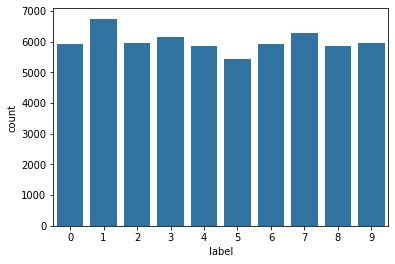

In [5]:
sns.countplot(y, color=sns.color_palette()[0])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Acc: 0.9654


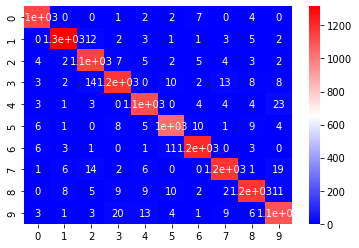

In [7]:
def fit_random_forest_cls(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = RandomForestClassifier()

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print('Acc: %.4f' %acc)

    # plot confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, cmap='bwr')

fit_random_forest_cls(X, y)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
def do_pca(n_componenets, data):
    X = StandardScaler().fit_transform(data)

    pca = PCA(n_components=n_componenets)
    X_pca = pca.fit_transform(data)
    return pca, X_pca

In [10]:
pca, X_pca = do_pca(2, X)

In [11]:
X_pca.shape

(60000, 2)

In [12]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924])

Acc: 0.4137


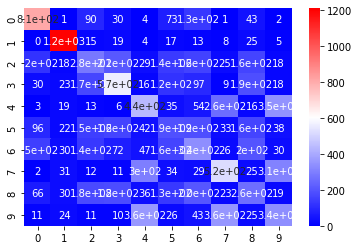

In [13]:
fit_random_forest_cls(X_pca, y)

In [14]:
pca.components_.shape

(2, 784)

In [21]:
np.min(X_pca, axis=0)

array([-1081.6623103 , -1382.37145719])

In [25]:
X_pca[:100].shape

(100, 2)

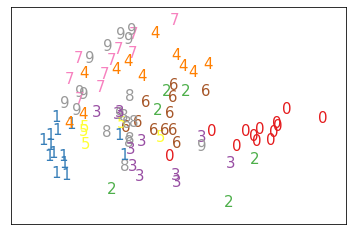

In [28]:
def plot_components(X, y):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    n_samples = X.shape[0]
    for i in range(n_samples):
        plt.text(X[i][0], X[i][1], str(y[i]), color=plt.cm.Set1(y[i]), fontdict={'size':15})

    plt.xticks([])
    plt.yticks([])
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

plot_components(X_pca[:100], y[:100])

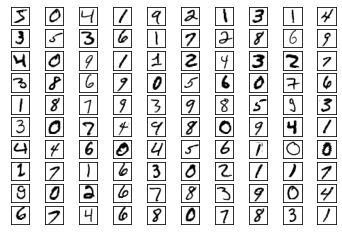

In [43]:
def show_images(n_images):
    for i in range(n_images):
        plt.subplot(n_images//10, 10, i + 1)
        plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='binary')
        plt.xticks([])
        plt.yticks([])

show_images(100)

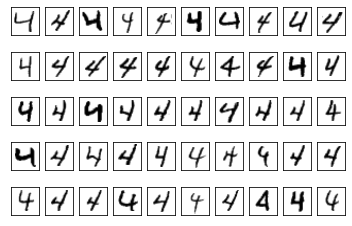

In [54]:
def show_images_by_digit(digit):
    images = X[y == digit].values[:50]
    for i in range(50):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='binary')
        plt.yticks([])
        plt.xticks([])
show_images_by_digit(4)